In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

code -> GitHub
data -> Database or in CSV/Text file Online

In [1]:
CO2_emission = pd.read_csv(r'D:\pobrane\cumulative-co-emissions.csv')
print (CO2_emission)

NameError: name 'pd' is not defined

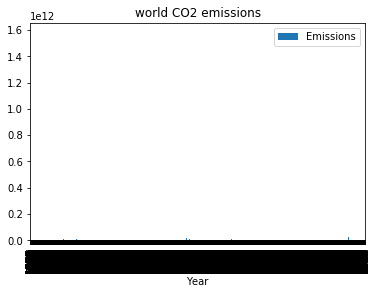

In [7]:
CO2_emission.plot(kind='bar', y='Emissions', x='Year', title="world CO2 emissions")
plt.show()

In [6]:
# I wanted to use this, but I don`t know how# pd.date_range(start='1/1/1930', end='1/08/2000', closed=None, freq= 'YS', utc=True)

# Solution

Partial solution to get you going. It is better to download the file via python, this way the code works on all PC's. In your case above I would not have access to your .csv file stored on your local pc.

In [5]:
import requests
import os
import zipfile
import pandas
import matplotlib.pyplot as plt

#Paths
ROOT_PATH = os.path.abspath("")
zip_folder = os.path.join(ROOT_PATH, "zipdownload")
zip_path = os.path.join(ROOT_PATH, "zipdownload", "download.zip")

#Download the zip file
csv_link = "http://api.worldbank.org/v2/en/indicator/EN.ATM.CO2E.KT?downloadformat=csv"
f = requests.get(csv_link)
with open(zip_path, "wb") as code:
    code.write(f.content)

#unzip
zip = zipfile.ZipFile(zip_path)
file = zip.extractall(zip_folder)

#read csv into pandas df
csv_path = os.path.join(ROOT_PATH, "zipdownload", "API_EN.ATM.CO2E.KT_DS2_en_csv_v2_887574.csv")
df = pandas.read_csv(csv_path, skiprows=4)

#Plot (not pretty but it works)
_df = df.melt(id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"]
        , var_name="Year", value_name="Emissions"
       ).groupby(by="Year")["Emissions"].sum()

_df.plot(kind='bar', y='Emissions', x='Year', title="world CO2 emissions")
plt.show()